# The Kernel Trick: Nonlinear Support Vector Machines

## Objective

Demonstrate how SVMs achieve nonlinear classification using kernel functions,
without explicitly computing high-dimensional feature mappings.

We will explore:
- Why linear SVM fails on nonlinear data
- Polynomial kernel
- RBF kernel
- Effect of gamma
- Interaction between C and gamma


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.svm import SVC

## Mathematical Background

Kernel SVM decision function:

f(x) = Σ αᵢ yᵢ K(xᵢ, x) + b

Where:
- Only support vectors have non-zero αᵢ
- K(xᵢ, x) computes similarity in implicit feature space

The kernel trick allows computation of inner products in high-dimensional
feature space without explicitly computing the feature transformation φ(x).


In [2]:
def plot_decision_boundary(model, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300),
        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300)
    )

    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_grid)
    y_pred = y_pred.reshape(x0.shape)

    ax.contourf(x0, x1, y_pred, alpha=0.2, cmap="bwr")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    return ax


## Nonlinearly Separable Data


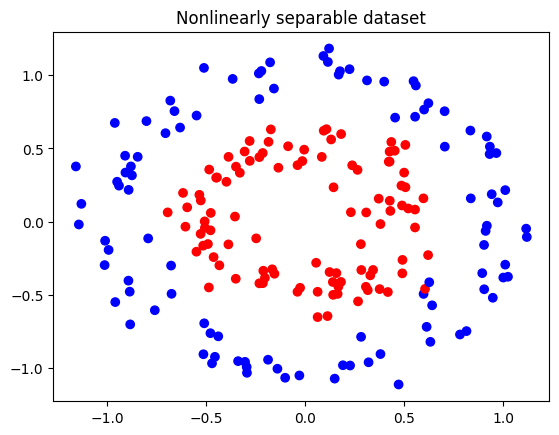

In [3]:
X, y = make_circles(
    n_samples = 200,
    factor = 0.5,
    noise = 0.1,
    random_state = 42
)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "bwr")
plt.title("Nonlinearly separable dataset")
plt.show()

In [4]:
linear_svm = SVC(kernel="linear")
linear_svm.fit(X, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


## Linear SVM (Expected to Fail)


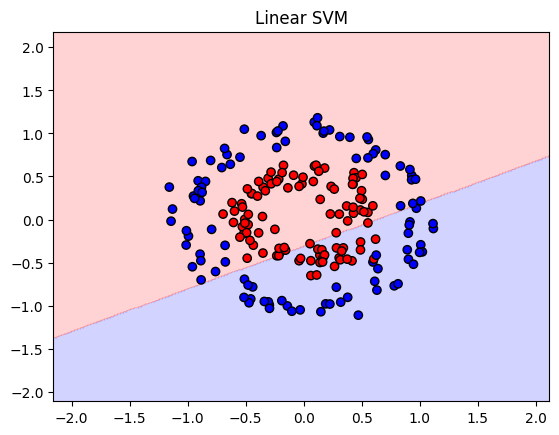

In [6]:
fig, ax = plt.subplots()
plot_decision_boundary(linear_svm, X, y, ax)
plt.title("Linear SVM")
plt.show()


## Interpertation

The linear SVM cannot separate circular data because no straight line
can divide the classes in the original feature space.


## Polynomial Kernel

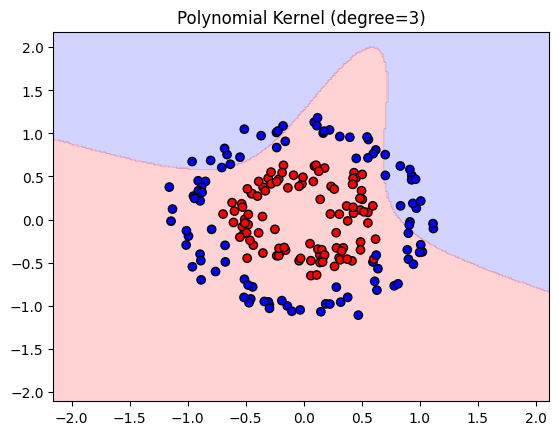

In [7]:
poly_svm = SVC(kernel="poly", degree=3, C=1.0)
poly_svm.fit(X, y)

fig, ax = plt.subplots()
plot_decision_boundary(poly_svm, X, y, ax)
plt.title("Polynomial Kernel (degree=3)")
plt.show()


## Interpretation

The polynomial kernel maps data into higher-dimensional space,
allowing nonlinear boundaries.


## Radial Basis Function (RBF) Kernel


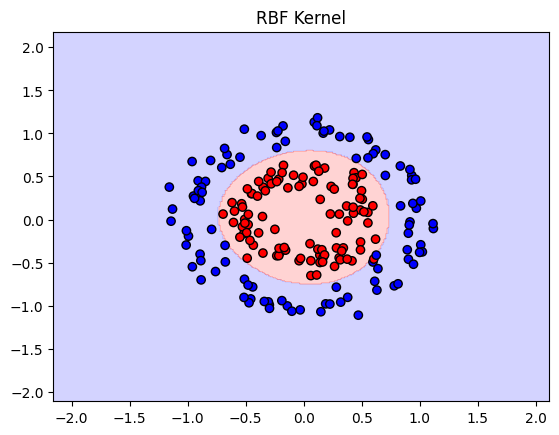

In [8]:
rbf_svm = SVC(kernel="rbf", gamma=1.0, C=1.0)
rbf_svm.fit(X, y)

fig, ax = plt.subplots()
plot_decision_boundary(rbf_svm, X, y, ax)
plt.title("RBF Kernel")
plt.show()


## Effect of Gamma


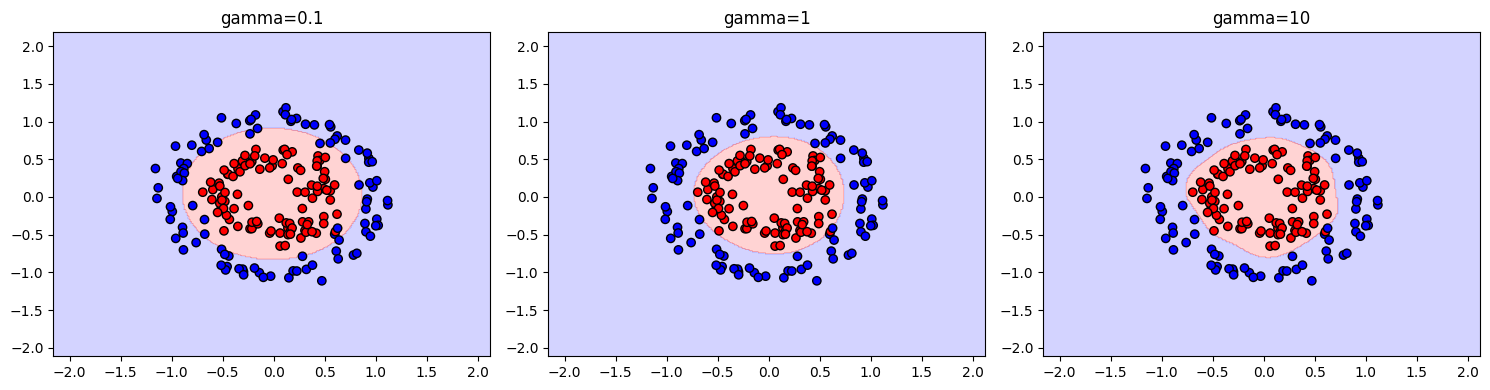

In [9]:
gammas = [0.1, 1, 10]

fig, axes = plt.subplots(1, 3, figsize=(15,4))

for i, gamma in enumerate(gammas):
    model = SVC(kernel="rbf", gamma=gamma, C=1.0)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, axes[i])
    axes[i].set_title(f"gamma={gamma}")

plt.tight_layout()
plt.show()


## Interpretation

Small gamma → Smooth boundary (high bias)
Large gamma → Highly flexible boundary (high variance)


In [10]:
## Interaction Between C and Gamma


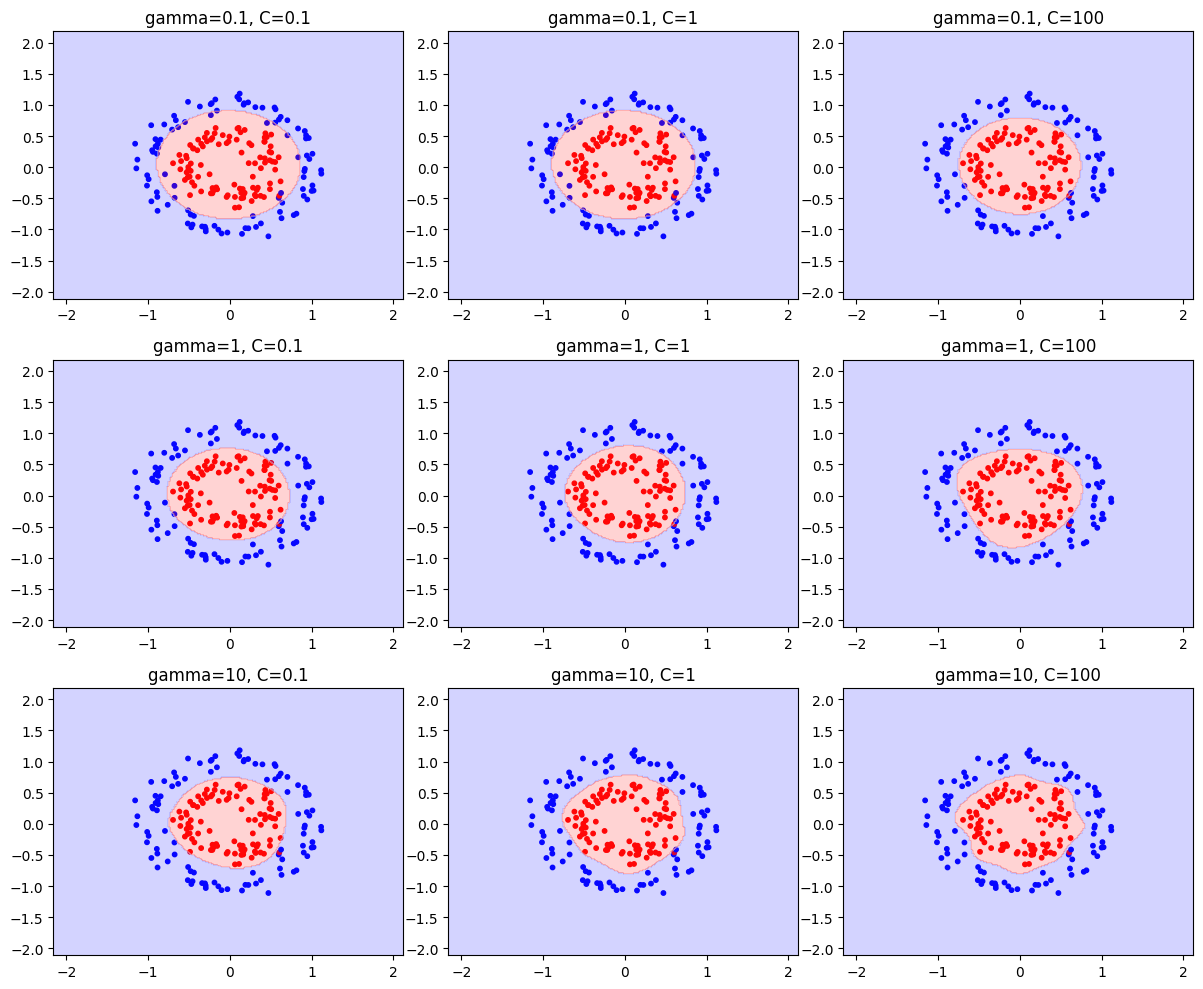

In [ ]:
from sklearn.model_selection import ParameterGrid

gammas = [0.1, 1, 10]
Cs = [0.1, 1, 100]

fig, axes = plt.subplots(len(gammas), len(Cs), figsize=(12, 10))

for i, gamma in enumerate(gammas):
    for j, C in enumerate(Cs):
        model = SVC(kernel="rbf", gamma=gamma, C=C)
        model.fit(X, y)
        
        ax = axes[i, j]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", s=10)
        
        x0, x1 = np.meshgrid(
            np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 200),
            np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 200)
        )
        
        X_grid = np.c_[x0.ravel(), x1.ravel()]
        y_pred = model.predict(X_grid)
        y_pred = y_pred.reshape(x0.shape)
        
        ax.contourf(x0, x1, y_pred, alpha=0.2, cmap="bwr")
        ax.set_title(f"gamma={gamma}, C={C}")

plt.tight_layout()
plt.show()


## Key Takeaways

- Linear SVM fails on nonlinear data
- Kernels allow implicit high-dimensional mappings
- RBF kernel corresponds to infinite-dimensional feature space
- Gamma controls locality of influence
- C controls margin vs violation trade-off
- High gamma + high C leads to overfitting
